<a href="https://colab.research.google.com/github/Farhan-Karim/AI-ML/blob/main/Polynomail_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial Regression



In [ ]:
import pandas as pd
df = pd.read_csv('/content/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
df['sex'] = df['sex'].replace({'female': 0, 'male': 1})
df['smoker'] = df['smoker'].replace({'yes': 1, 'no': 0})
df['region'] = df['region'].replace({'southwest': 1, 'southeast': 2, 'northwest': 3, 'northeast': 4})

In [ ]:
X = df.drop(columns = ['charges'])
y = df['charges']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.25, random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train_scaler = scalar.fit_transform(X_train)
X_test_scaler = scalar.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=6)
X_poly_train = poly.fit_transform(X_train_scaler)
X_test_poly = poly.transform(X_test_scaler)
poly.fit(X_poly_train, y_train)
lin.fit(X_poly_train, y_train)

LinearRegression()

In [ ]:
y_pred = lin.predict(X_test_poly)

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

113512.73724513786

In [ ]:
y_pred_train = lin.predict(X_poly_train)
mean_absolute_error(y_train, y_pred_train)

3.1126366952966767e-10

In [ ]:
poly = PolynomialFeatures(degree=3)
X_poly_train = poly.fit_transform(X_train_scaler)
X_test_poly = poly.transform(X_test_scaler)
poly.fit(X_poly_train, y_train)
lin = LinearRegression()
lin.fit(X_poly_train, y_train)

LinearRegression()

In [ ]:
y_pred = lin.predict(X_test_poly)
mean_absolute_error(y_test, y_pred)

3391.843012180279

In [ ]:
y_pred_train = lin.predict(X_poly_train)
mean_absolute_error(y_train, y_pred_train)

2735.472328473054

ValueError: ignored

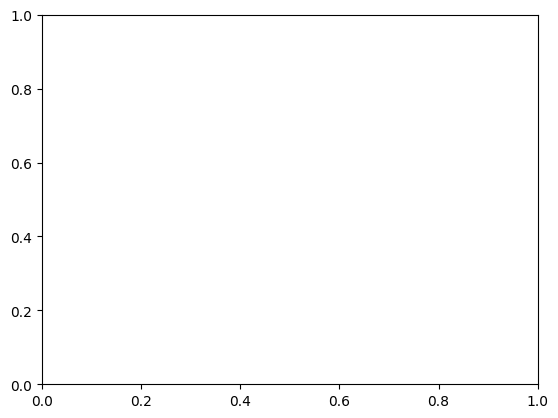

In [ ]:
import matplotlib.pyplot as plt
# plt.scatter(y_test, linear_predictions,color = 'red', alpha=0.5, s=130, label='Linear Regression')
plt.scatter(X_poly_train, y_train,color = 'green', alpha=0.5, s=130, label='Polynomial Regression')
plt.legend()
plt.show()